In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hossammohammedrostom","key":"ba65de7095d326e21caed45e8a2ffa49"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c prediction-interval-competition-ii-house-price


  0% 0.00/20.6M [00:00<?, ?B/s]
100% 20.6M/20.6M [00:00<00:00, 1.31GB/s]


In [ ]:
!unzip prediction-interval-competition-ii-house-price.zip -d .


Archive:  prediction-interval-competition-ii-house-price.zip
  inflating: ./dataset.csv           
  inflating: ./sample_submission.csv  
  inflating: ./test.csv              


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('dataset.csv')
dt=pd.read_csv('test.csv')

In [ ]:
df.head(10)

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,...,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,0,0,0,0,0,0,0,0,0,P
5,5,2010-02-15,575000,3.0,,nochg,2025,47.6813,-122.3666,82,...,0,0,0,0,0,0,0,0,0,B
6,6,2016-10-15,276000,2.0,,nochg,2025,47.4245,-122.1773,51,...,0,0,0,0,0,0,0,0,0,K
7,7,2001-08-15,235000,1.0,,nochg,2025,47.3090,-122.3490,54,...,0,0,0,0,0,0,0,0,0,I
8,8,2002-01-15,239950,1.0,,nochg,2025,47.4955,-122.3565,96,...,0,0,0,0,0,0,0,0,0,G
9,9,2022-05-15,2160000,2.0,,reno - before,2025,47.6538,-122.3952,11,...,0,0,0,0,0,0,0,0,0,D


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 non-null  int64  
 16  year_built        20

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200000.0,99999.500000,57735.171256,0.0000,49999.7500,99999.5000,149999.2500,1.999990e+05
sale_price,200000.0,584149.494690,417059.519757,50293.0000,305000.0000,459950.0000,724950.0000,2.999950e+06
sale_nbr,157818.0,2.162599,1.113090,1.0000,1.0000,2.0000,3.0000,1.100000e+01
join_year,200000.0,2023.403600,6.241643,1999.0000,2025.0000,2025.0000,2025.0000,2.025000e+03
latitude,200000.0,47.549248,0.142710,47.1552,47.4465,47.5628,47.6735,4.777780e+01
longitude,200000.0,-122.210416,0.140339,-122.5277,-122.3238,-122.2227,-122.1217,-1.211613e+02
area,200000.0,48.644215,27.132002,1.0000,26.0000,48.0000,71.0000,1.000000e+02
present_use,200000.0,4.108860,7.199323,2.0000,2.0000,2.0000,2.0000,2.900000e+01
land_val,200000.0,460169.092410,351044.447775,0.0000,231000.0000,377000.0000,594000.0000,1.386400e+07
imp_val,200000.0,491771.491330,368050.501496,0.0000,280000.0000,409000.0000,599000.0000,1.006700e+07


In [ ]:
df.isnull().sum()


,0
id,0
sale_date,0
sale_price,0
sale_nbr,42182
sale_warning,0
join_status,0
join_year,0
latitude,0
longitude,0
area,0


In [ ]:
dfedit = df.drop(['sale_nbr', 'submarket', 'subdivision'], axis=1)
dtedit = dt.drop(['sale_nbr', 'submarket', 'subdivision'], axis=1)


In [ ]:
dfedit= dfedit.drop(['year_reno','wfnt','golf','greenbelt','noise_traffic','view_rainier',
'view_olympics',
'view_cascades',
'view_territorial',
'view_skyline',
'view_sound',
'view_lakewash',
'view_lakesamm',
'view_otherwater',
'view_other'], axis=1)
dtedit= dtedit.drop(['year_reno','wfnt','golf','greenbelt','noise_traffic','view_rainier',
'view_olympics',
'view_cascades',
'view_territorial',
'view_skyline',
'view_sound',
'view_lakewash',
'view_lakesamm',
'view_otherwater',
'view_other'], axis=1)

In [ ]:

dfedit.index

RangeIndex(start=0, stop=200000, step=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfedit_zscaled = dfedit.copy()
numeric_cols = dfedit.select_dtypes(include=['int64', 'float64']).columns
dfedit_zscaled[numeric_cols] = scaler.fit_transform(dfedit[numeric_cols])


scaler = StandardScaler()
dtedit_zscaled = dtedit.copy()
numeric_cols = dtedit.select_dtypes(include=['int64', 'float64']).columns
dtedit_zscaled[numeric_cols] = scaler.fit_transform(dtedit[numeric_cols])

In [ ]:
xtrain= dfedit_zscaled.drop(['sale_price'], axis=1)
ytrain= dfedit['sale_price']
xtrain = xtrain._get_numeric_data()
y=dfedit['sale_price']
x=dfedit.drop(['sale_price'], axis=1)
x=x._get_numeric_data()
xtest=dtedit._get_numeric_data()
dfcorr = df._get_numeric_data()


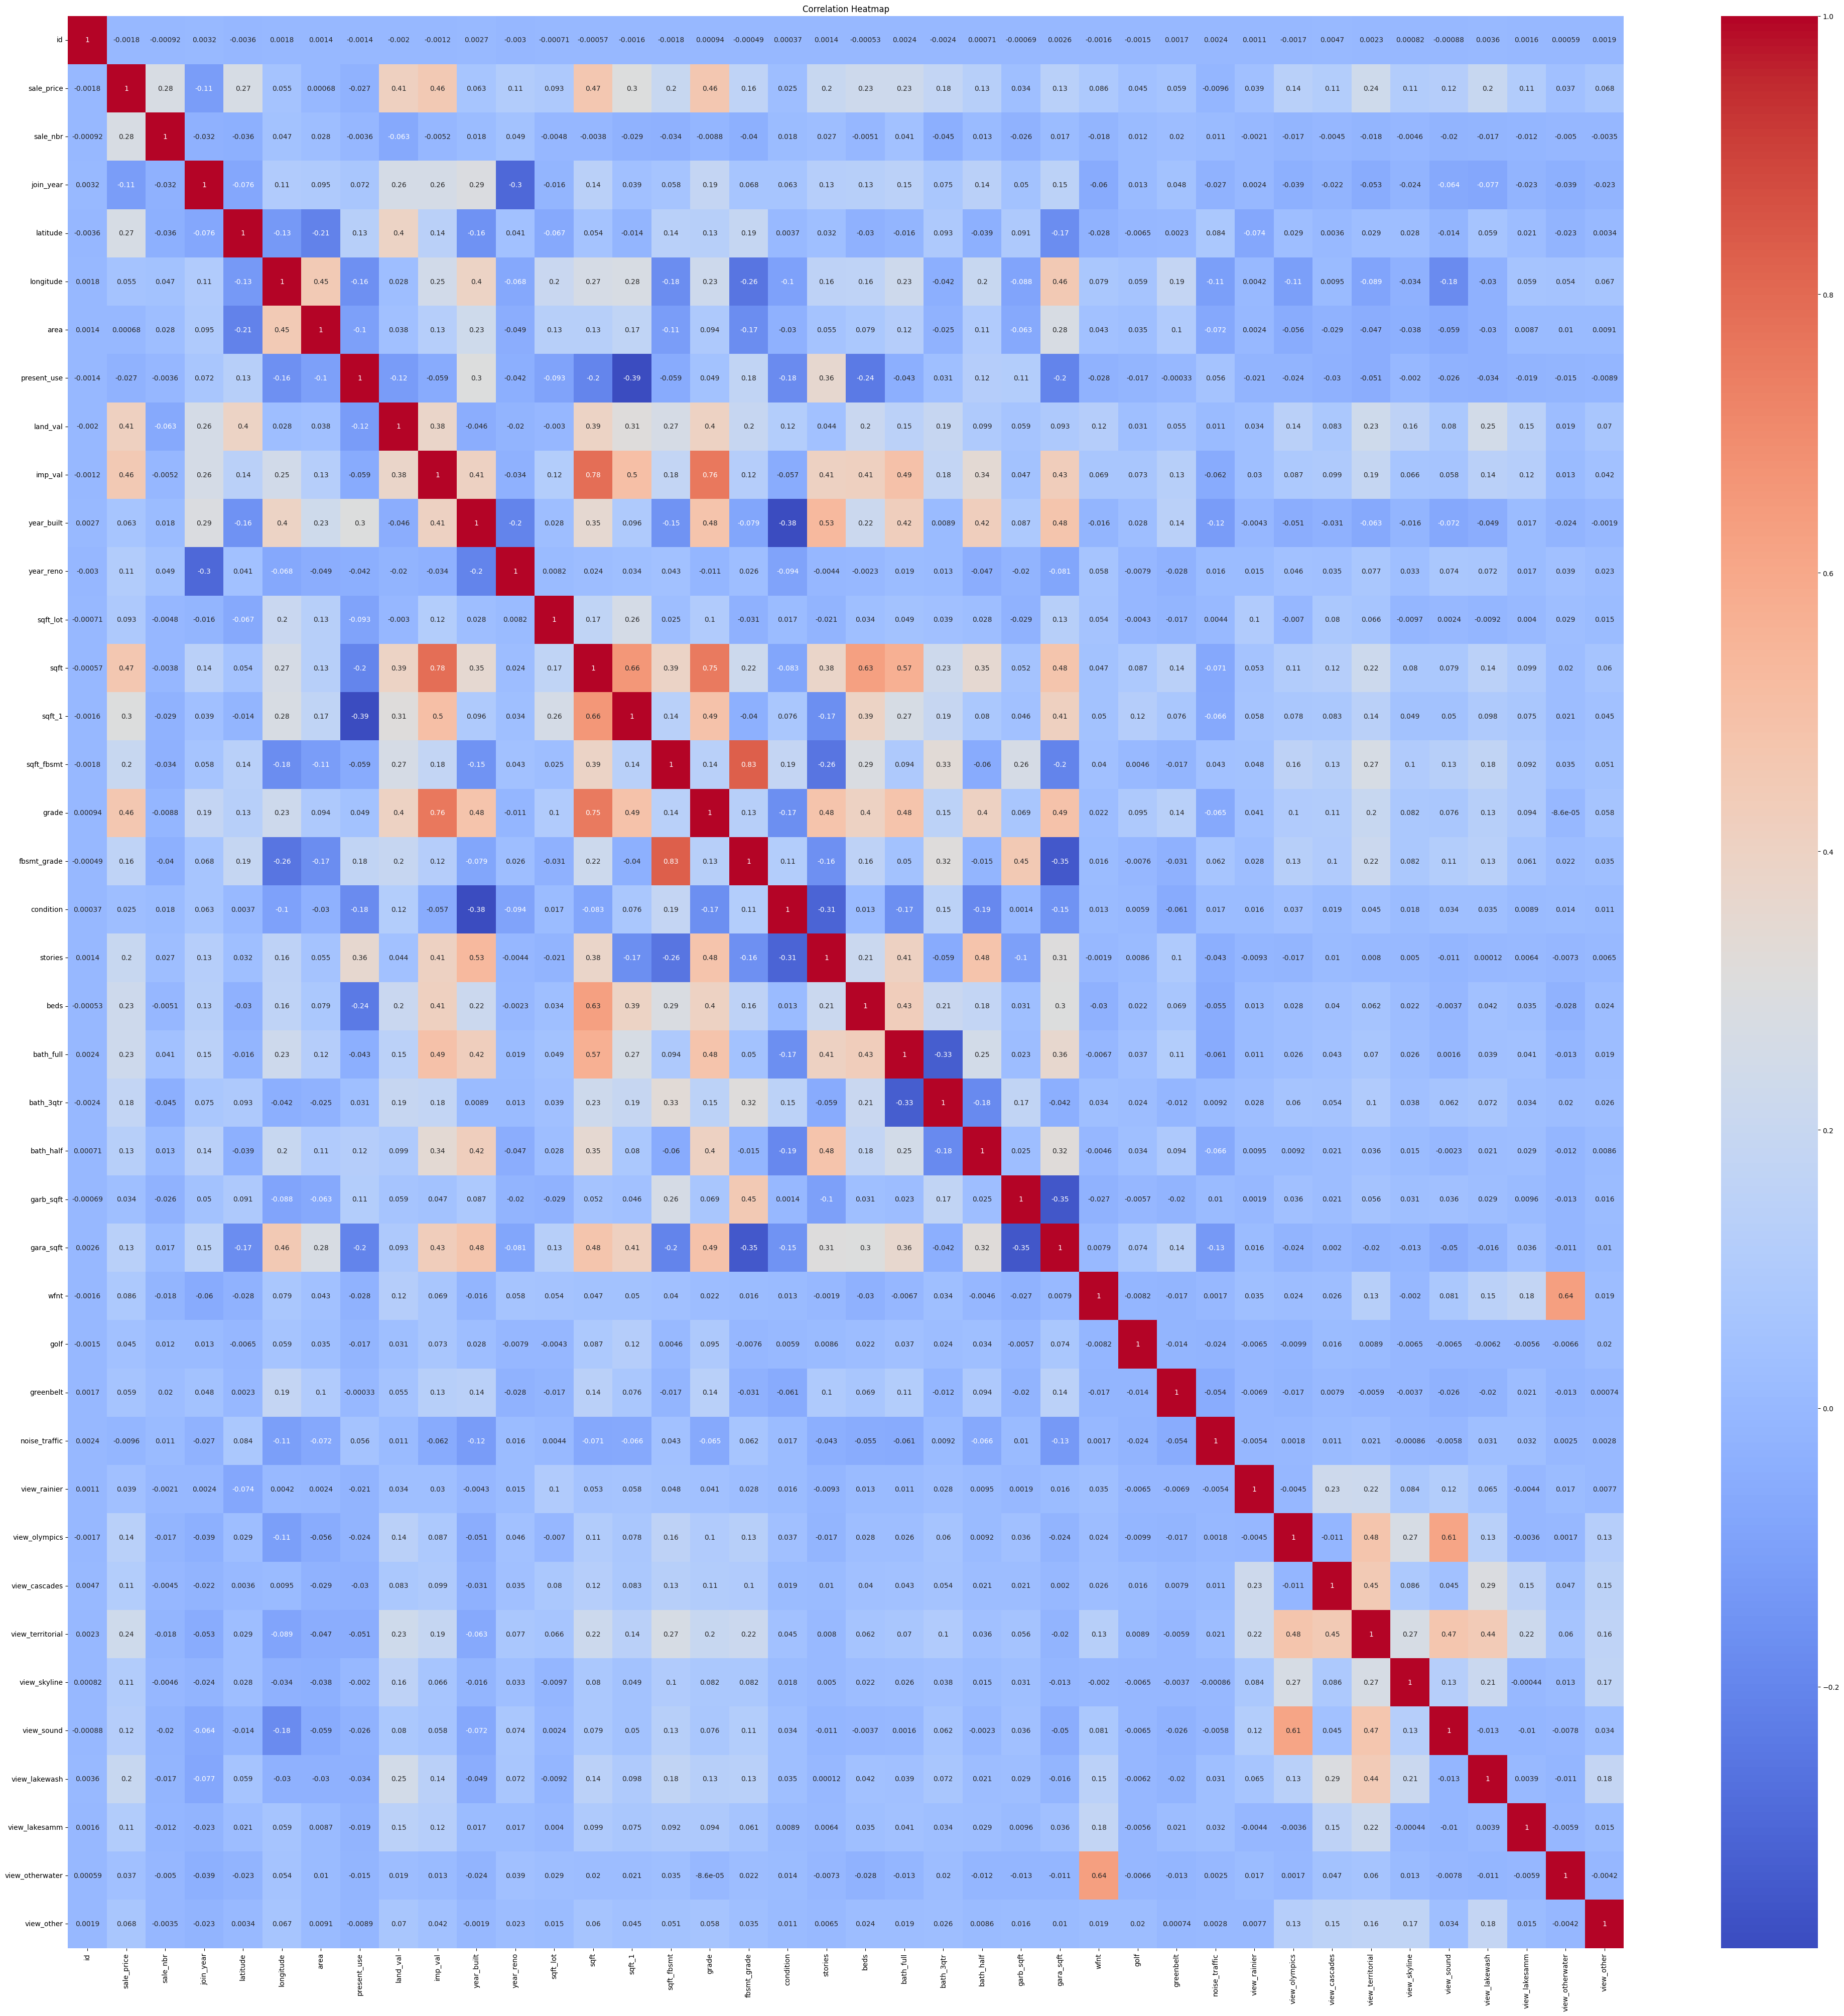

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_sample = dfedit.sample(n=300, random_state=42)
selected_cols = ['sale_price', 'sqft', 'sqft_lot', 'beds', 'bath_full', 'condition', 'grade']


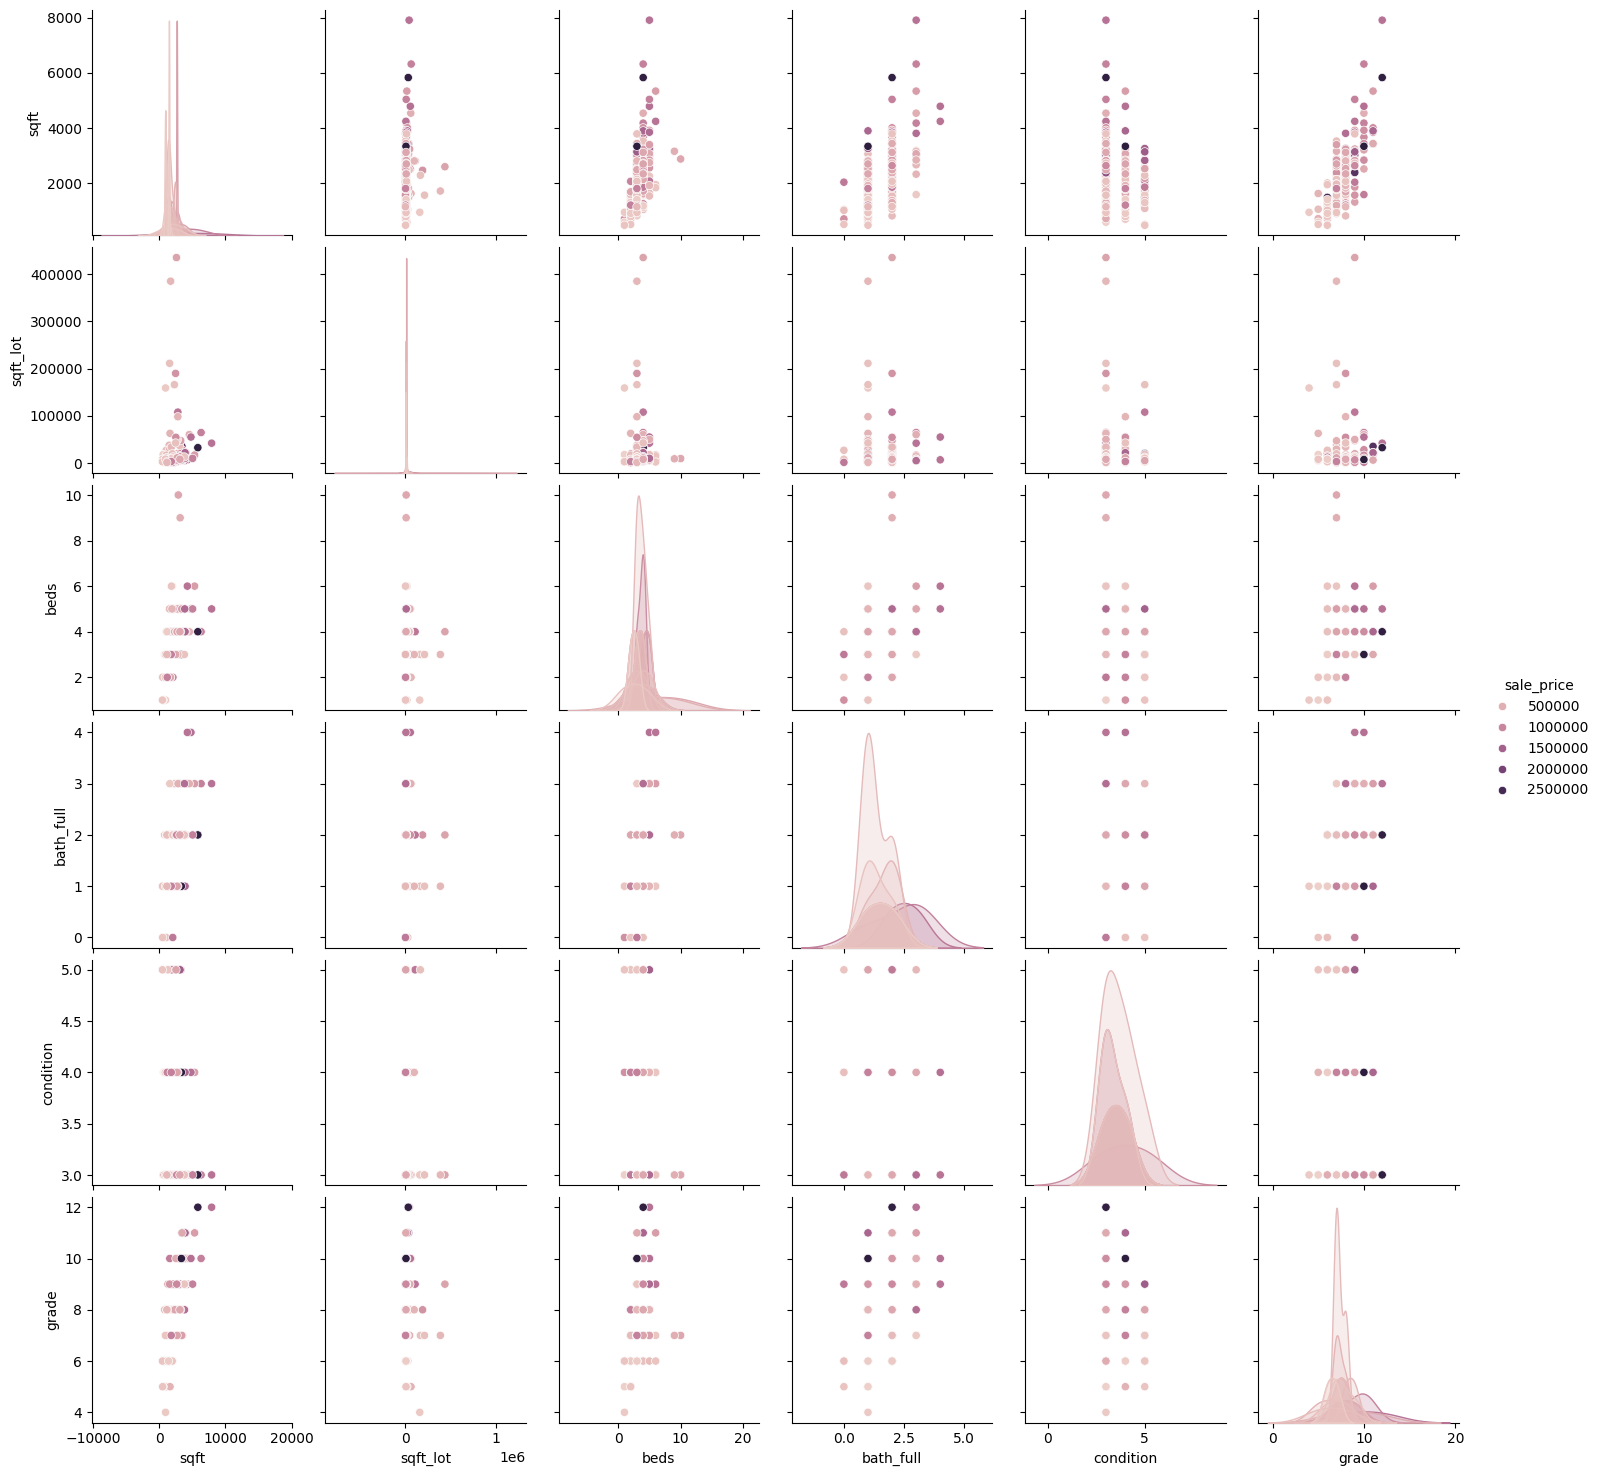

In [ ]:
sns.pairplot(df_sample[selected_cols], hue='sale_price')


<Axes: xlabel='sqft', ylabel='sale_price'>

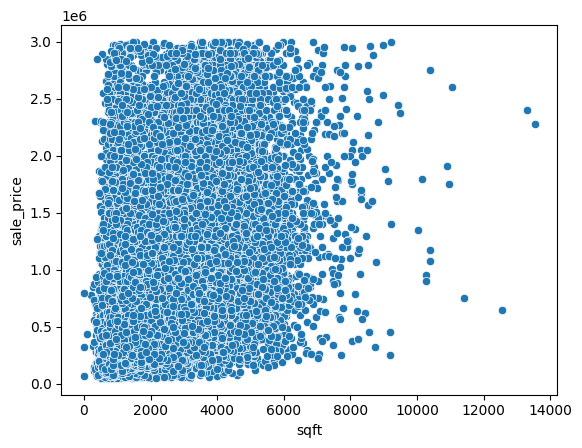

In [ ]:
sns.scatterplot(x='sqft', y='sale_price', data=dfedit)


<Axes: xlabel='sale_date'>

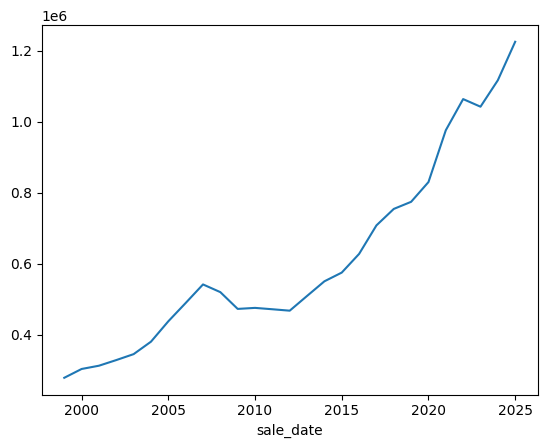

In [ ]:
dfedit['sale_date'] = pd.to_datetime(dfedit['sale_date'])
dfedit.groupby(dfedit['sale_date'].dt.year)['sale_price'].mean().plot()


<Axes: xlabel='sale_price', ylabel='Count'>

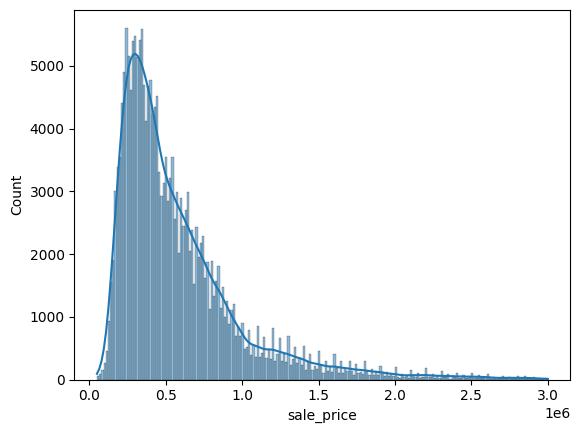

In [ ]:
sns.histplot(dfedit['sale_price'], kde=True)


In [ ]:
(dfedit == 0).sum()
dfedit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            200000 non-null  int64         
 1   sale_date     200000 non-null  datetime64[ns]
 2   sale_price    200000 non-null  int64         
 3   sale_warning  200000 non-null  object        
 4   join_status   200000 non-null  object        
 5   join_year     200000 non-null  int64         
 6   latitude      200000 non-null  float64       
 7   longitude     200000 non-null  float64       
 8   area          200000 non-null  int64         
 9   city          200000 non-null  object        
 10  zoning        200000 non-null  object        
 11  present_use   200000 non-null  int64         
 12  land_val      200000 non-null  int64         
 13  imp_val       200000 non-null  int64         
 14  year_built    200000 non-null  int64         
 15  sqft_lot      200

In [ ]:
(dfedit == 0).sum()


,0
id,1
sale_date,0
sale_price,0
sale_warning,0
join_status,0
join_year,0
latitude,0
longitude,0
area,0
city,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier , StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_features=0.333,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

ypred = model.predict(xvalid)

print("MAE:", mean_absolute_error(yvalid, ypred))
print("R² Score:", r2_score(yvalid, ypred))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


MAE: 210979.52847825
R² Score: 0.46505734691434253


In [ ]:
test_ids = dt["id"]


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
import pandas as pd

def winkler_score(y_true, l, u, alpha=0.1):
    score = []
    for yt, lo, up in zip(y_true, l, u):
        width = up - lo
        if lo <= yt <= up:
            s = width
        elif yt < lo:
            s = width + (2 / alpha) * (lo - yt)
        else:
            s = width + (2 / alpha) * (yt - up)
        score.append(s)
    return np.mean(score)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

models = [
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost', xgb.XGBRegressor(n_estimators=100, random_state=42))
]

all_test_preds = []
all_val_true = []
all_val_preds = []
for name, model in models:
    fold_test_preds = []
#NAME MODEL AND FOLD ,SAMPLE PRED IN LIST

    for fold, (train_idx, val_idx) in enumerate(kf.split(xtrain)):
        x_tr, x_val = xtrain.iloc[train_idx], xtrain.iloc[val_idx]
        y_tr, y_val = ytrain.iloc[train_idx], ytrain.iloc[val_idx]

        model.fit(x_tr, y_tr)
        val_preds = model.predict(x_val)
        test_preds = model.predict(xtest)
#to save the y_val once fot all
        if name == models[0][0]:
            all_val_true.extend(y_val.tolist())
        all_val_preds.append(val_preds)
        fold_test_preds.append(test_preds)

        rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        print(f"{name} - Fold {fold+1} RMSE: {rmse:.4f}")

    all_test_preds.append(fold_test_preds)

all_test_preds = np.array(all_test_preds)
all_test_preds = all_test_preds.transpose(1, 2, 0).reshape(-1, xtest.shape[0]).T
#final pred for testfile for every sample in
alpha = 0.1
lower = np.percentile(all_test_preds, 100 * (alpha / 2), axis=1)
upper = np.percentile(all_test_preds, 100 * (1 - alpha / 2), axis=1)
final_preds = all_test_preds.mean(axis=1)
#score from valid
val_preds_stack = np.array(all_val_preds).T
val_lower = np.percentile(val_preds_stack, 100 * (alpha / 2), axis=1)
val_upper = np.percentile(val_preds_stack, 100 * (1 - alpha / 2), axis=1)
winkler = winkler_score(all_val_true, val_lower, val_upper, alpha)
print(f"\nWinkler Interval Score (on validation): {winkler:.4f}")

submission = pd.DataFrame({
    "id": test_ids,
    "lower": lower,
    "upper": upper,
    "prediction": final_preds
})
submission.to_csv("submission.csv", index=False)
print("\nsubmission.csv file saved successfully.")


RandomForest - Fold 1 RMSE: 302417.8897
RandomForest - Fold 2 RMSE: 305982.1438
RandomForest - Fold 3 RMSE: 300966.3230
RandomForest - Fold 4 RMSE: 307329.9226
RandomForest - Fold 5 RMSE: 304887.0130
GradientBoosting - Fold 1 RMSE: 299755.0581
GradientBoosting - Fold 2 RMSE: 303138.5380
GradientBoosting - Fold 3 RMSE: 299884.5949
GradientBoosting - Fold 4 RMSE: 303019.4737
GradientBoosting - Fold 5 RMSE: 301889.2050
XGBoost - Fold 1 RMSE: 295767.5645
XGBoost - Fold 2 RMSE: 298482.8539
XGBoost - Fold 3 RMSE: 293372.3839
XGBoost - Fold 4 RMSE: 300212.5464
XGBoost - Fold 5 RMSE: 298124.5991

Winkler Interval Score (on validation): 2050670.6720

submission.csv file saved successfully.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

def winkler_score(y_true, l, u, alpha=0.1):
    score = []
    for yt, lo, up in zip(y_true, l, u):
        width = up - lo
        if lo <= yt <= up:
            s = width
        elif yt < lo:
            s = width + (2 / alpha) * (lo - yt)
        else:
            s = width + (2 / alpha) * (yt - up)
        score.append(s)
    return np.mean(score)

def build_nn_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

n_splits = 1
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

all_test_preds = []
all_val_true = []
all_val_preds = []

for fold, (train_idx, val_idx) in enumerate(kf.split(xtrain)):
    x_tr, x_val = xtrain.iloc[train_idx], xtrain.iloc[val_idx]
    y_tr, y_val = ytrain.iloc[train_idx], ytrain.iloc[val_idx]

    model = build_nn_model(input_dim=xtrain.shape[1])
    model.fit(x_tr, y_tr, epochs=50, batch_size=32, verbose=0)

    val_preds = model.predict(x_val).reshape(-1)
    test_preds = model.predict(xtest).reshape(-1)

    if fold == 0:
        all_val_true.extend(y_val.tolist())
    all_val_preds.append(val_preds)
    all_test_preds.append(test_preds)

    rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    print(f"NeuralNet - Fold {fold+1} RMSE: {rmse:.4f}")

all_test_preds = np.array(all_test_preds)
all_test_preds = all_test_preds.T

alpha = 0.1
lower = np.percentile(all_test_preds, 100 * (alpha / 2), axis=1)
upper = np.percentile(all_test_preds, 100 * (1 - alpha / 2), axis=1)
final_preds = all_test_preds.mean(axis=1)

val_preds_stack = np.array(all_val_preds).T
val_lower = np.percentile(val_preds_stack, 100 * (alpha / 2), axis=1)
val_upper = np.percentile(val_preds_stack, 100 * (1 - alpha / 2), axis=1)
winkler = winkler_score(all_val_true, val_lower, val_upper, alpha)
print(f"\nWinkler Interval Score (on validation): {winkler:.4f}")

submission = pd.DataFrame({
    "id": test_ids,
    "lower": lower,
    "upper": upper,
    "prediction": final_preds
})
submission.to_csv("submission nn.csv", index=False)
print("\nsubmission.csv file saved successfully.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
NeuralNet - Fold 1 RMSE: 314611.2805


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
NeuralNet - Fold 2 RMSE: 318571.3003


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
